# Rivers Flow Data

In [1]:
import numpy as np
from __future__ import division

import extreme_data as extr
import clef_algo as clf
import hill_estimator as hill
import peng_estimator as peng
import kappa_estimator as kap
import hydro_map as hm
import damex_algo as dmx

## Load data

In [2]:
X = np.load('data/hydro_data/raw_discharge.npy')
V = extr.rank_transformation(X)
n, d = V.shape

## CLEF + Frequency

In [ ]:
r_min = 0.3
k = int(n/R - 1)
alphas_r = extr.freq_0(x_bin_clf, k, r_min)
hm.map_visualisation(alphas_r, d)

## CLEF

In [ ]:
R = 100
print 'nb extreme points:', np.sum(np.sum(V > R, axis=1) > 0)
V_bin = 1.*(V > R)
V_bin = V_bin[np.sum(V_bin, axis=1) > 1]
kappa_min = 0.2
alphas_clf = clf.clef_0(V_bin, kappa_min)
hm.map_visualisation(alphas_clf, d)

## DAMEX

In [ ]:
eps_dmx = 0.1
x_bin_dmx = extr.extreme_points_bin(x_rank, R=R, eps=eps_dmx,
                                    without_zeros=True)
x_bin_dmx = x_bin_dmx[np.sum(x_bin_dmx, axis=1) > 1]
alphas_dmx, mass = dmx.damex_0(x_bin_dmx)
alphas_dmx = alphas_dmx[:np.sum(mass > 1)]
hm.map_visualisation(alphas_dmx, d)

## CLEF asymptotic

## Hill

nb extreme points: 295
2
3
4


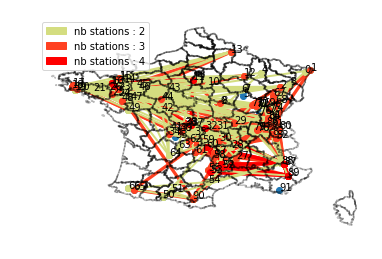

In [7]:
R = 2000
k = int(n/R - 1)
print 'nb extreme points:', np.sum(np.sum(V > R, axis=1) > 0)
r_p = V.shape[0]/(k + int(k**(3./4)) + 1)
r_m = V.shape[0]/(k - int(k**(3./4)) + 1)
delta = 0.5
alphas_hill = hill.hill_0(V, V > R, V > r_p, V > r_m, delta, k)
hm.map_visualisation(alphas_hill, d)